# Exercise 5

In [9]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

### Comparison with uniform distribution

In [10]:
cx = [1,3,2,8,18,41,47,39,24,8,3]
px = cx/np.sum(cx)

def KL(p,q):
    s = 0
    for i in range(len(p)):
        pi = p[i]
        if pi!=0:
            s += pi*np.log2(pi/q[i])
    return s

uni = 1/11*np.ones(11)

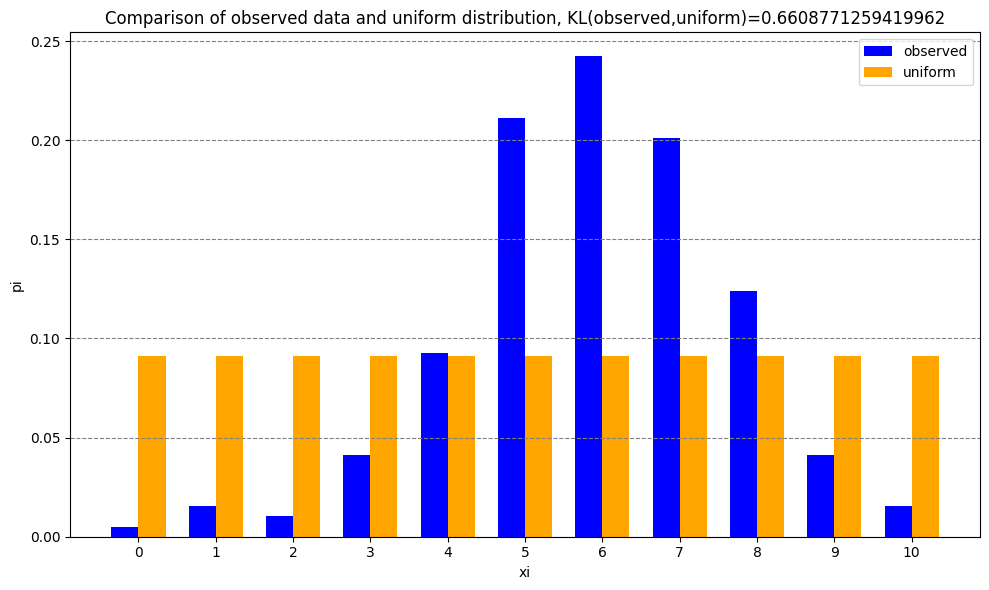

In [11]:
# Show all of them in one plot
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the bar positions
indices = np.arange(11)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot the first set of bars
plt.bar(indices, px, width=bar_width, color='blue', label='observed')

# Plot the second set of bars, offsetting their position by the bar width
plt.bar(indices + bar_width, uni, width=bar_width, color='orange', label='uniform')

# Add labels and title
plt.xlabel('xi')
plt.ylabel('pi')
plt.title('Comparison of observed data and uniform distribution, KL(observed,uniform)='+str(KL(px,uni)))
plt.xticks(indices + bar_width / 2, range(11))  # Set x-ticks to be in the middle of the grouped bars
plt.legend()  # Show legend

# Add grid
plt.grid(axis='y', linestyle='--', color='gray')

# Show the plot
plt.tight_layout()
plt.show()


### Comparison with binomial distribution

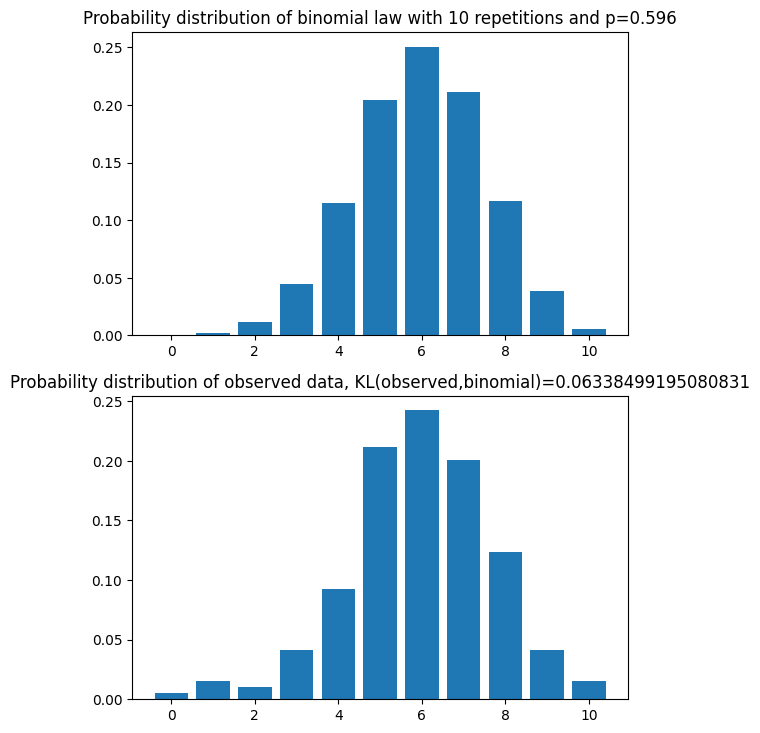

In [12]:
from math import factorial, inf,pow
minkl = inf
best = 0
for p in np.arange(0.001,1,0.001):
    binomial = [(factorial(10))/(factorial(k)*factorial(10-k))*pow(p,k)*pow(1-p,10-k) for k in range(11)]
    kl = KL(px,binomial)
    if kl < minkl:
        minkl = kl
        best = p

fig,ax = plt.subplots(2)
ax[0].bar(range(11),[(factorial(10))/(factorial(k)*factorial(10-k))*pow(best,k)*pow(1-best,10-k) for k in range(11)])
ax[0].title.set_text('Probability distribution of binomial law with 10 repetitions and p='+str(best))
ax[1].bar(range(11),px)
ax[1].title.set_text('Probability distribution of observed data, KL(observed,binomial)='+str(minkl))
plt.subplots_adjust(top=1.5)
plt.show()